In [9]:
# Dados do dataset

import pandas as pd

df = pd.read_csv("diabetes.csv")
#df_filtered = df[(df != 0).all(axis=1)]
df_filtered.head(10)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
6,3,78,50,32,88,31.0,0.248,26,1
8,2,197,70,45,543,30.5,0.158,53,1
13,1,189,60,23,846,30.1,0.398,59,1
14,5,166,72,19,175,25.8,0.587,51,1
19,1,115,70,30,96,34.6,0.529,32,1
24,11,143,94,33,146,36.6,0.254,51,1
25,10,125,70,26,115,31.1,0.205,41,1
31,3,158,76,36,245,31.6,0.851,28,1
39,4,111,72,47,207,37.1,1.390,56,1
43,9,171,110,24,240,45.4,0.721,54,1


In [ ]:
# Pre processamento

# Retirar nulos e zeros

# Clusterizar coisas
# normalizar
# Testar as variaveis que tenham melhor correlação

In [7]:
# Estatisticas
import pandas as pd
df = pd.read_csv("diabetes.csv")
#df = df[(df != 0).all(axis=1)]


print("Quantidade de NaN")
qnt_nan = df.isna().sum()
print(qnt_nan)


print("\n Quantidade de zeros")
qnt_zero = (df == 0).sum()
print(qnt_zero)

print("\n Quantidade de nulos")
qnt_null = df.isnull().sum()
print(qnt_null)


Quantidade de NaN
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

 Quantidade de zeros
Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

 Quantidade de nulos
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


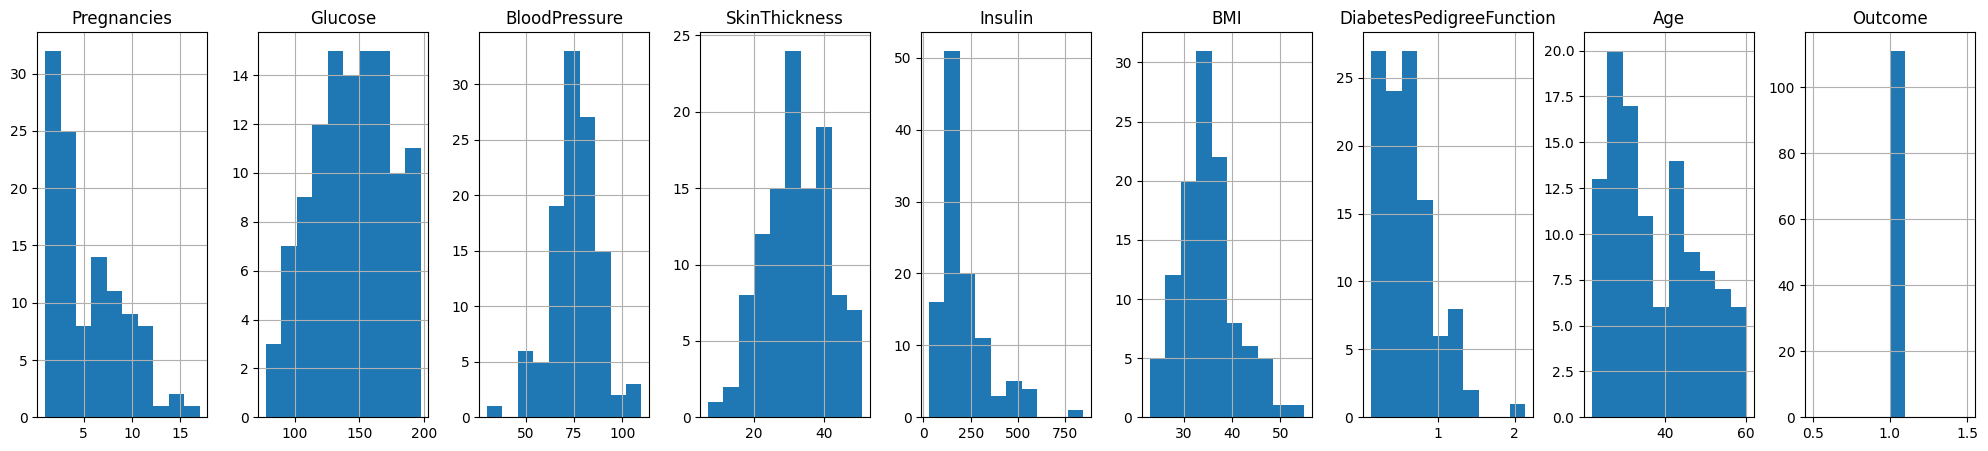

In [8]:
# Histogramas
import matplotlib.pyplot as plt#df_filtered
df = pd.read_csv("diabetes.csv")
df = df[(df != 0).all(axis=1)]

fig, axes = plt.subplots(1, len(df.columns), figsize=(25, 5))

for i, column in enumerate(df.columns):
    df.hist(column=[column], ax=axes[i])
    axes[i].set_title(column)


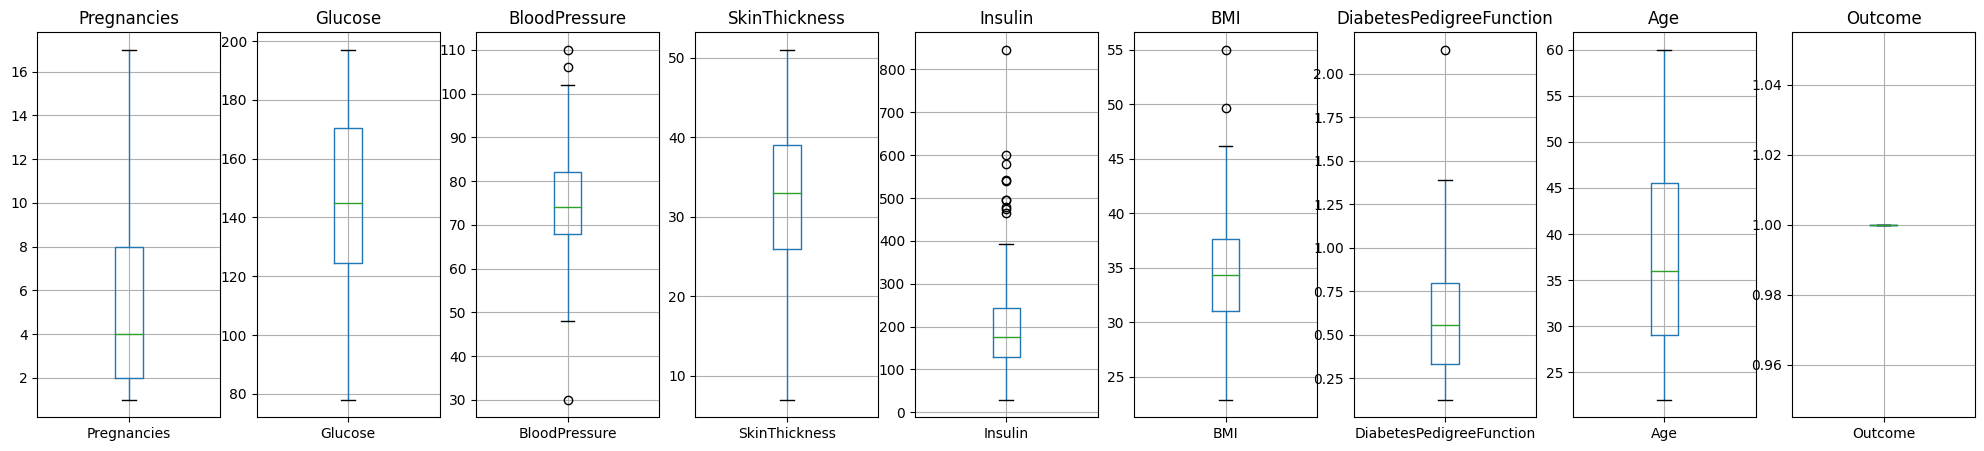

In [9]:
# Boxplots

import matplotlib.pyplot as plt
df = pd.read_csv("diabetes.csv")
df = df[(df != 0).all(axis=1)]

fig, axes = plt.subplots(1, len(df.columns), figsize=(25, 5)) 

for i, column in enumerate(df.columns):
    df.boxplot(column=[column], ax=axes[i])
    axes[i].set_title(column)

In [ ]:
# Pre processamento
def clusteringBloodPressure(x):
    if x < 60:
        return 0
    elif x < 70:
        return 1
    elif x < 90:
        return 2
    else:
        return 3
    
def clusteringAge(x):
    if x < 25:
        return 0
    elif x < 40:
        return 1 
    elif x < 55:
        return 2
    else:
        return 3
    
def clusteringGlucose(x):
    if x < 70:
        return 0
    elif x < 100:
        return 1 
    elif x < 126:
        return 2
    else:
        return 3
    
        
def clusteringBMI(x):
    if x < 19:
        return 0
    elif x < 25:
        return 1 
    elif x < 30:
        return 2
    else:
        return 3

    
def dropNullAndZero(df):
    df = df.dropna(axis=0)
    df = df[(df != 0).all(axis=1)]
    return df

# Completar com a media





In [19]:
# Sci-kitlearn

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
import pandas as pd


data = pd.read_csv('diabetes.csv')

#feature_cols = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness','Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
feature_cols = ['Pregnancies', 'Glucose',  'SkinThickness', 'BMI', 'DiabetesPedigreeFunction','Age']
f2 = ['Pregnancies', 'Glucose',  'SkinThickness', 'BMI', 'DiabetesPedigreeFunction','Age','Outcome']
X = data[f2]
X = X[(X[feature_cols] != 0).all(axis=1)]
y = X.Outcome
X = X.drop(columns=['Outcome'])

    
def clusteringAge(x):
    if x < 25:
        return 0
    elif x < 40:
        return 1 
    elif x < 55:
        return 2
    else:
        return 3
    
def clusteringGlucose(x):
    if x < 70:
        return 0
    elif x < 100:
        return 1 
    elif x < 126:
        return 2
    else:
        return 3
    
        
def clusteringBMI(x):
    if x < 19:
        return 0
    elif x < 25:
        return 1 
    elif x < 30:
        return 2
    else:
        return 3



# Discretizando valores
X['BMI'] = X['BMI'].apply(clusteringBMI)

X['Age'] = X['Age'].apply(clusteringAge)

# Split de treino e de teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=42)

# Modelo de LR
logistic_model = LogisticRegression(random_state=0,max_iter=10000).fit(X_train, y_train)
pred = logistic_model.predict(X_test)

scr = logistic_model.score(X_test,y_test)

print(scr)

# Kfold com k=10
kf = KFold(n_splits=10, shuffle=True, random_state=0)
accuracy_scores = []

# Perform 10-fold cross-validation
for train_index, test_index in kf.split(X_test):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Initialize and train a logistic regression model
    logistic_model = LogisticRegression(random_state=0, max_iter=10000)
    logistic_model.fit(X_train, y_train)
    
    # Calculate the accuracy score for this fold
    accuracy = logistic_model.score(X_test, y_test)
    
    # Append the accuracy score to the list
    accuracy_scores.append(accuracy)

# Calculate the mean accuracy across all folds
mean_accuracy = sum(accuracy_scores) / len(accuracy_scores)

print("Accuracy for each fold:", accuracy_scores)
print("Mean Accuracy across all folds:", mean_accuracy)

# TODO testar para overfitting

0.7841530054644809
Accuracy for each fold: [0.8648648648648649, 0.8378378378378378, 0.7837837837837838, 0.8378378378378378, 0.7837837837837838, 0.8378378378378378, 0.7777777777777778, 0.7777777777777778, 0.8888888888888888, 0.6388888888888888]
Mean Accuracy across all folds: 0.802927927927928


In [ ]:
# Logistic Regression with Tensorflow


